## Classification demo including training

In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
from PIL import Image

In [3]:
## Initialising the CNN
classifier = Sequential()

In [4]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
## Flattening
classifier.add(Flatten())

In [6]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [7]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [10]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
## Importing training data
train_set = train_datagen.flow_from_directory('Pizza\\train_set',
                                               target_size=(150,150),
                                               
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
train_set.class_indices

{'Burnt_Pizza': 0, 'Good_Pizza': 1}

In [14]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'Burnt_Pizza': 0, 'Good_Pizza': 1}


In [15]:
## Importng test data
test_set = test_datagen.flow_from_directory('Pizza\\test_set',
                                            target_size=(150,150),
                                            
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [17]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=5,
        validation_data=test_set
        )

Epoch 1/5
63/63 [==============================] - 68s 1s/step - loss: 0.6256 - accuracy: 0.6480 - val_loss: 0.3291 - val_accuracy: 0.7400
Epoch 2/5
63/63 [==============================] - 57s 897ms/step - loss: 0.5195 - accuracy: 0.7450 - val_loss: 0.2855 - val_accuracy: 0.7400
Epoch 3/5
63/63 [==============================] - 64s 1s/step - loss: 0.4549 - accuracy: 0.7910 - val_loss: 0.7678 - val_accuracy: 0.6500
Epoch 4/5
63/63 [==============================] - 57s 907ms/step - loss: 0.4415 - accuracy: 0.7955 - val_loss: 0.5549 - val_accuracy: 0.6700
Epoch 5/5
63/63 [==============================] - 65s 1s/step - loss: 0.3784 - accuracy: 0.8360 - val_loss: 0.2512 - val_accuracy: 0.7600


## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=5,
        validation_data=test_set,
        validation_steps=38)

In [52]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('Pizza\\inference\\good1.jpg'
                           ,target_size =(150,150))


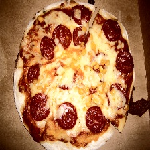

In [53]:
test_image

In [54]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [55]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,150,150,3)

In [56]:
result = classifier.predict(test_image)

In [57]:
## Class label of dog and cat

if result == 1:
    prediction = 'Good Pizza'
else:
   prediction = 'Burnt'
    

In [58]:
prediction

'Good Pizza'

In [49]:
#steps_per_epoch=50
model_json = classifier.to_json()
with open('pizzamodel.json','w') as json_file:
    json_file.write(model_json)
#Serialize weight to HDFS
classifier.save_weights('pizzamodel.h5')
print('Model Saved')

Model Saved
